# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "xiong_fei"
filename = monster + "_20200713.csv"

max_skills = [6, 3, 7]

df = pd.read_csv(filename)
df_full = pd.read_csv(filename)
df_full = df_full[df_full["Stars"] == 6]
print(df.columns)
runes_cols = ["Slot" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc',
       'CRate', 'CDmg', 'Eff', 'Eff.HP', 'Sets', 'Skillups', 'Acquired',
       'Slot1', 'Slot2', 'Slot3', 'Slot4', 'Slot5', 'Slot6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,...,Eff.HP,Sets,Skillups,Acquired,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6
587,40,6,25593,886,2634,249,61,59,25,55,...,265118,Focus + Guard + Will,"[6, 3, 7]",2016-04-29,ATK+,SPD,DEF+,DEF%,HP+,DEF%
264,40,6,25922,1175,3115,180,61,49,37,57,...,312165,Blade + Guard + Guard,"[6, 3, 7]",2018-02-18,ATK+,DEF%,DEF+,DEF%,HP+,DEF%
479,40,6,21851,1339,2577,182,49,20,71,150,...,221995,Fatal + Focus,"[6, 3, 7]",2016-05-15,ATK+,DEF%,DEF+,CDmg%,HP+,DEF%
426,40,6,29464,733,2062,213,25,27,68,130,...,246230,Destroy + Rage,"[6, 3, 7]",2016-05-01,ATK+,SPD,DEF+,HP%,HP+,DEF%
372,40,6,31220,900,2942,190,38,27,25,55,...,357063,Energy + Guard + Shield,"[5, 3, 7]",2018-05-23,ATK+,DEF%,DEF+,HP%,HP+,DEF%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,35,5,11472,656,900,128,63,45,18,78,...,49214,Revenge + Violent,"[1, 1, 2]",2020-02-16,ATK+,SPD,DEF+,DEF%,HP+,ACC%
26,35,5,14821,558,1313,113,44,38,18,65,...,85006,Energy + Guard,"[1, 2, 2]",2017-01-20,ATK+,DEF%,DEF+,HP%,HP+,DEF%
573,40,6,22128,750,1315,114,78,21,23,62,...,127070,Endure + Energy + Revenge,"[6, 3, 7]",2018-04-06,ATK+,DEF%,DEF+,HP%,HP+,HP%
458,40,6,12860,883,2130,107,60,11,36,55,...,110532,Guard + Violent,"[6, 3, 7]",2018-01-06,ATK+,DEF%,DEF+,DEF%,HP+,DEF%


# Stars Distribution, picking 6*

(454, 21)


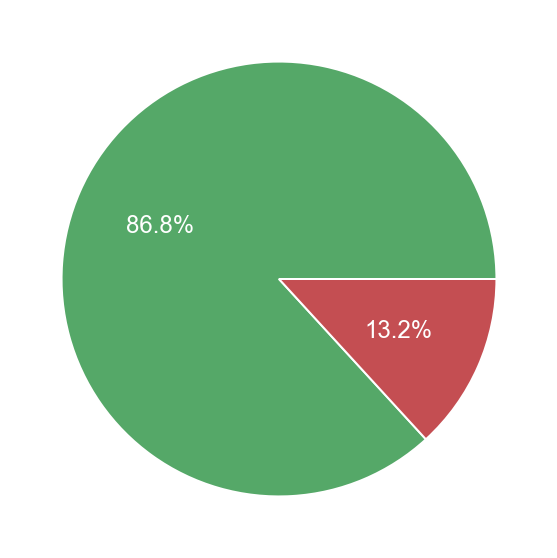

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Runes 

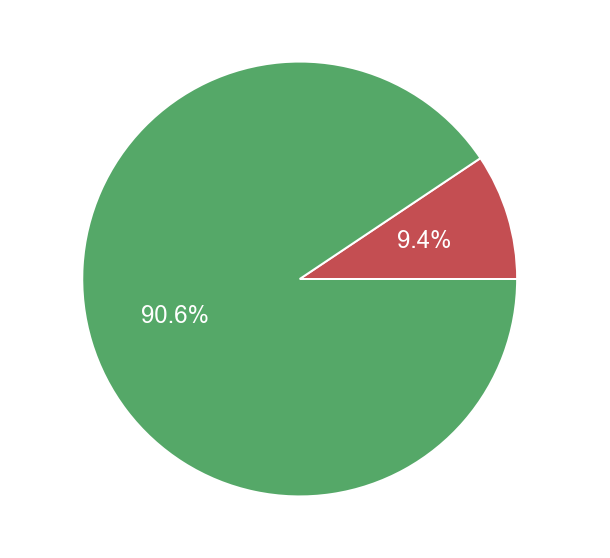

In [3]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without\nRunes': df_full.shape[0] - df_stars6.shape[0],
    'With\nRunes': df_stars6.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Skilled Up

{'All': 173, 'None': 256, '2nd & 3rd': 6}


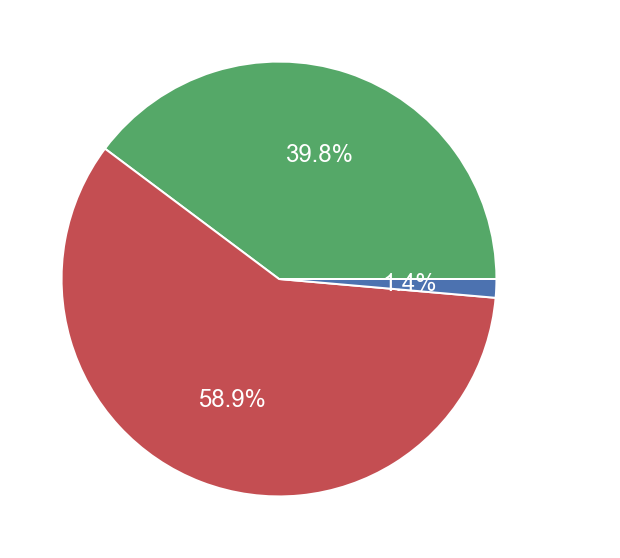

In [4]:
skills_count = {}

for value, count in df_stars6['Skillups'].value_counts().items():
    skillups = eval(value)
    if skillups == max_skills:
        skills_count['All'] = count
    elif skillups[:2] == max_skills[:2] and count > 5:
        skills_count['1st & 2nd'] = count
    elif [skillups[0], skillups[2]] == [max_skills[0], max_skills[2]] and count > 5:
        skills_count['1st & 3rd'] = count
    elif skillups[1:] == max_skills[1:] and count > 5:
        skills_count['2nd & 3rd'] = count
    elif skillups[0] == max_skills[0] and count > 5:
        skills_count['Only 1st'] = count
    elif skillups[1] == max_skills[1] and count > 5:
        skills_count['Only 2nd'] = count
    elif skillups[2] == max_skills[2] and count > 5:
        skills_count['Only 3rd'] = count
    else:
        if 'None' not in skills_count.keys():
            skills_count['None'] = 0
        skills_count['None'] += count

print(skills_count)
fig = plt.figure(figsize=(10, 10))
plt.pie(list(skills_count.values()), labels=skills_count.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

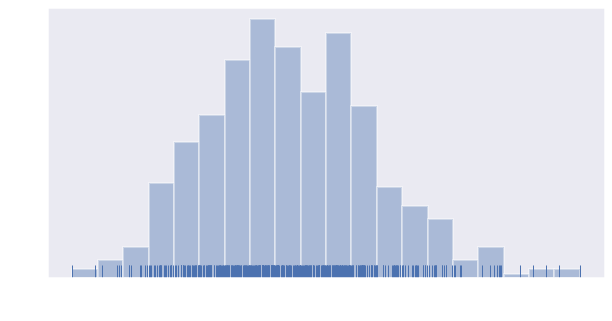

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff.HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# HP Distribution

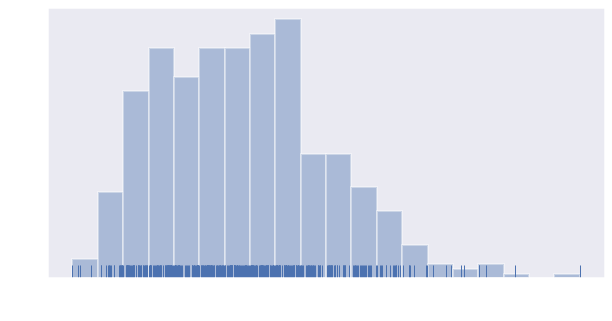

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_hp.png", transparent=True, bbox_inches = "tight")

# Attack Distribution

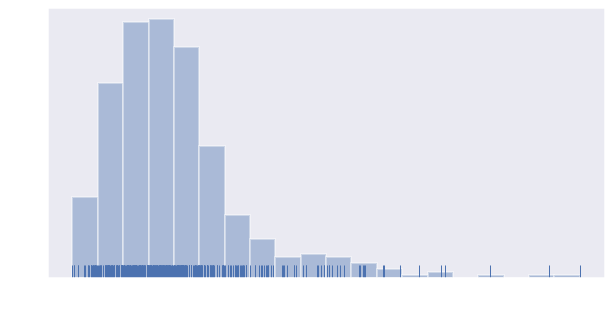

In [7]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Critical Rate Distribution

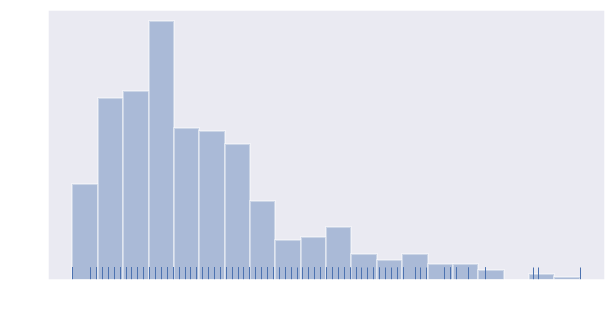

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CRate"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critrate.png", transparent=True, bbox_inches = "tight")

# Critical Damag Distribution

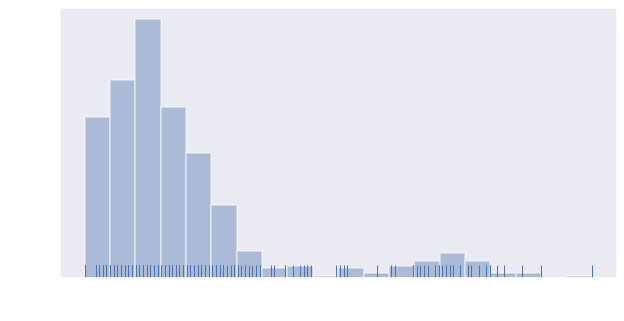

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CDmg"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critdmg.png", transparent=True, bbox_inches = "tight")

# Defense Distribution

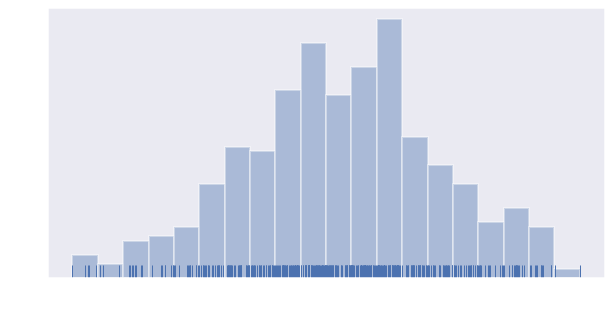

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Defense"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_defense.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

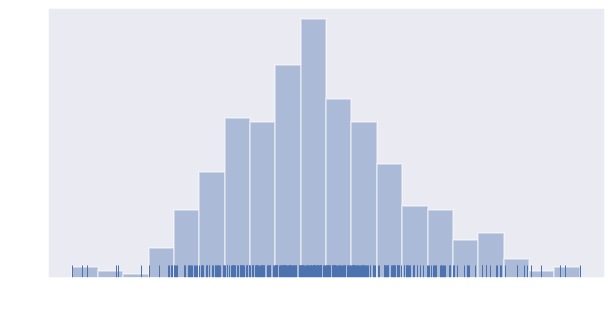

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Accuracy Distribution

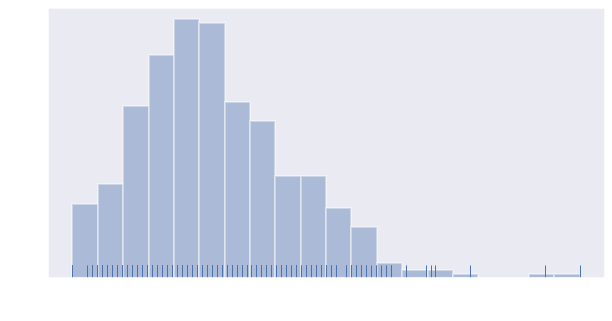

In [12]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Acc"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_acc.png", transparent=True, bbox_inches = "tight")

# Resistance Distribution

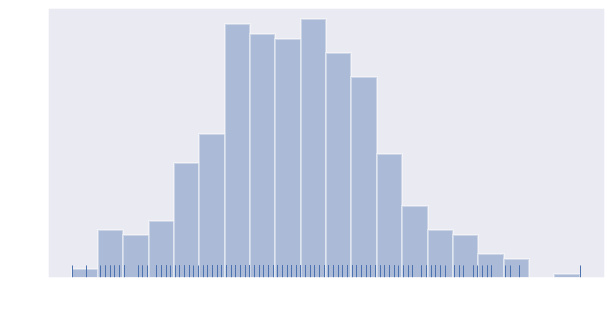

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Res"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_res.png", transparent=True, bbox_inches = "tight")

# Sets

Revenge + Violent              69
Guard + Violent                59
Violent                        19
Energy + Violent               19
Energy + Guard + Revenge       14
Endure + Violent               10
Guard + Guard + Revenge         9
Focus + Guard + Guard           8
Energy + Guard                  8
Guard + Revenge + Revenge       8
Broken                          8
Blade + Violent                 7
Focus + Violent                 7
Revenge + Revenge               6
Energy + Energy + Guard         6
Energy + Swift                  6
Energy + Guard + Shield         5
Guard + Guard + Guard           5
Nemesis + Violent               5
Shield + Violent                5
Energy + Guard + Guard          5
Revenge                         4
Endure + Energy + Revenge       4
Revenge + Revenge + Revenge     4
Energy                          4
Energy + Guard + Nemesis        4
Name: Sets, dtype: int64


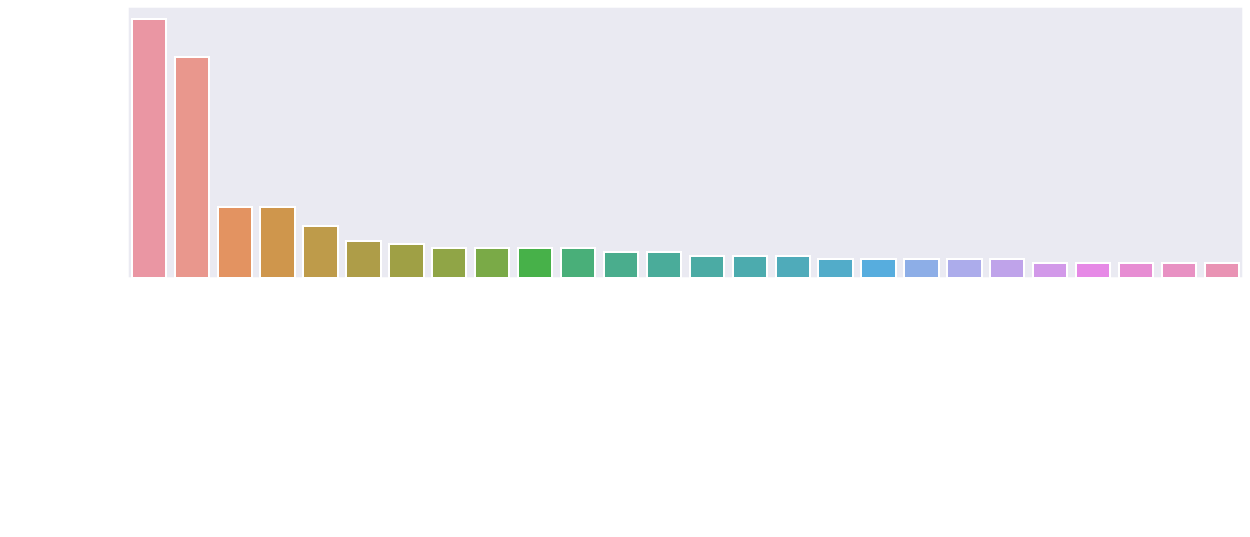

In [14]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 3]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# 4-Rune Sets

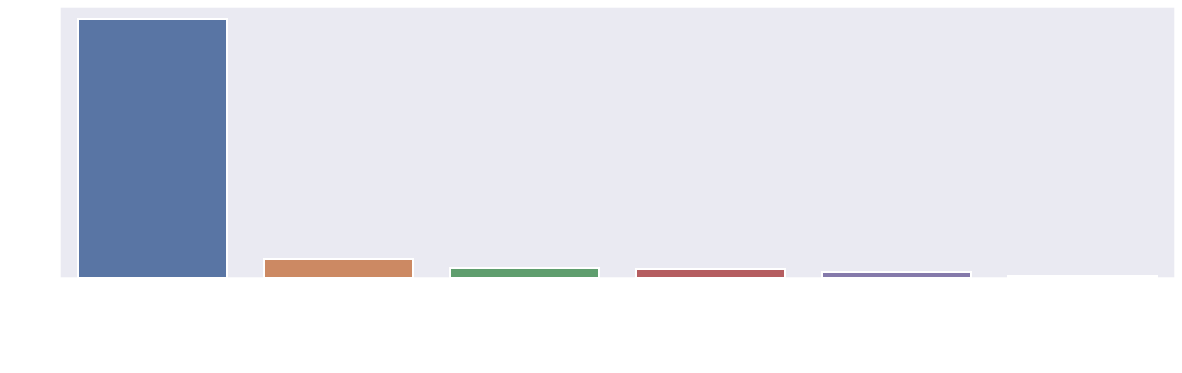

In [15]:
sets_4 = ['Violent', 'Swift', 'Rage', 'Fatal', 'Despair', 'Vampire']
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
set_sum = dict()
for set_4 in sets_4:
    indexes = [val for val in counts.index if set_4 in val]
    set_count = counts.loc[indexes]
    set_sum[set_4] = set_count.sum()
set_sum = {k: v for k, v in sorted(set_sum.items(), key=lambda item: item[1], reverse=True)}
x, y = list(set_sum.keys()), list(set_sum.values())
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_4sets.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

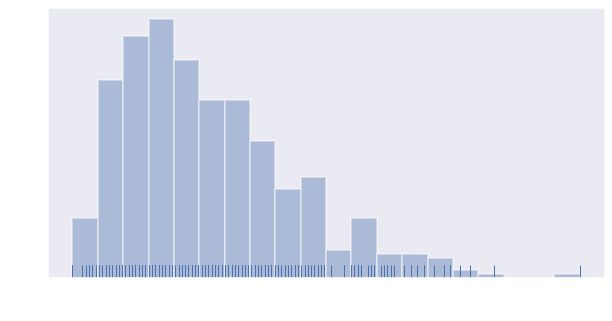

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Average & Best by Category

In [23]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc', 'CRate', 'CDmg', 'Eff', 'Eff.HP']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))

df_best.loc[1] = best
print("Average")
display(df_stars6[cols].describe().loc['mean'])
print("Best")
display(df_best)

Average


HP          22675.687225
Attack        913.841410
Defense      2151.356828
Speed         137.242291
Res            62.665198
Acc            28.878855
CRate          36.958150
CDmg           76.385463
Eff            75.948370
Eff.HP     195216.156388
Name: mean, dtype: float64

Best


,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,Eff,Eff.HP
ID,,,,,,,,,,
1,42862,1743,3115,249,124,102,101,189,103,357063


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Slot1', 'Slot3', 'Slot5', 'Level', 'Stars', 'Skillups'], axis=1).reset_index(drop=True).sort_values(['Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>CRate</th>
      <th>CDmg</th>
      <th>Eff</th>
      <th>Eff.HP</th>
      <th>Sets</th>
      <th>Slot2</th>
      <th>Slot4</th>
      <th>Slot6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>25593</td>
      <td>886</td>
      <td>2634</td>
      <td>249</td>
      <td>61</td>
      <td>59</td>
      <td>25</td>
      <td>55</td>
      <td>103.30</td>
      <td>265118</td>
      <td>Focus + Guard + Will</td>
      <td>SPD</td>
      <td>DEF%</td>
      <td>DEF%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>25922</td>
      <td>1175</td>
      <td>3115</td>
      <td>180</td>
      <td>61</td>
      <td>49</td>
      <td>37</td>
      <td>57</td>
      <td>101.81</td>
      <td>312165</td>
      <td>Blade + Guard + Guard</td

# Most common Builds

   Slot2  Slot4 Slot6  Count
15  DEF%   DEF%  DEF%     92
33   HP%   DEF%  DEF%     59
22  DEF%    HP%  DEF%     44
16  DEF%   DEF%   HP%     43
46   SPD   DEF%  DEF%     41
9   DEF%  CDmg%  DEF%     21
47   SPD   DEF%   HP%     20
36   HP%    HP%  DEF%     16
23  DEF%    HP%   HP%     15
34   HP%   DEF%   HP%     14
48   SPD    HP%  DEF%     13
11  DEF%  CDmg%   HP%      7
37   HP%    HP%   HP%      7
42   SPD  CDmg%  DEF%      6


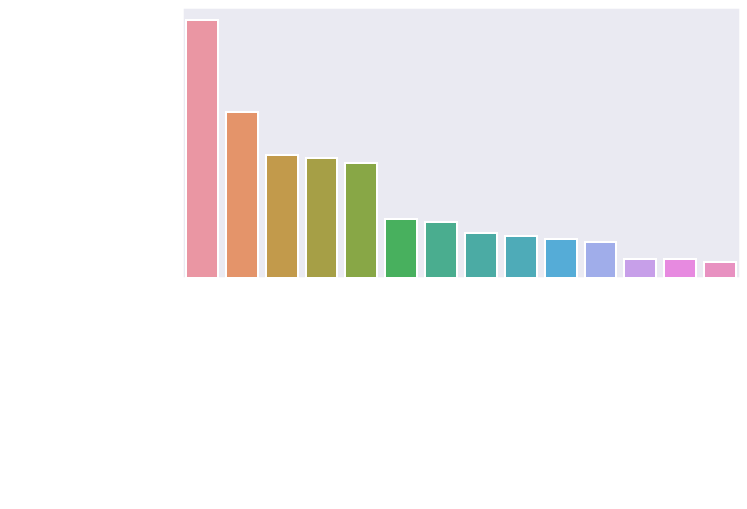

In [19]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Slot2", "Slot4", "Slot6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 5].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Slot2", "Slot4", "Slot6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

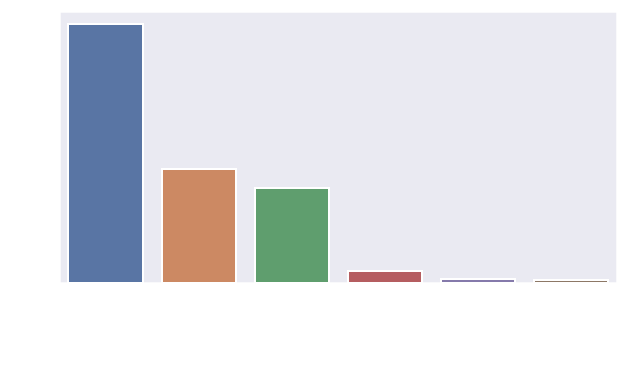

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Slot2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

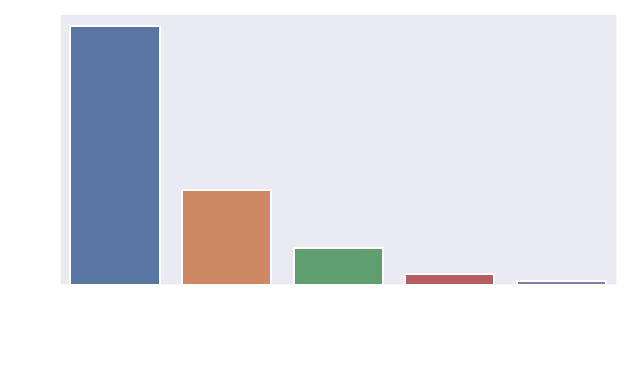

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Slot4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

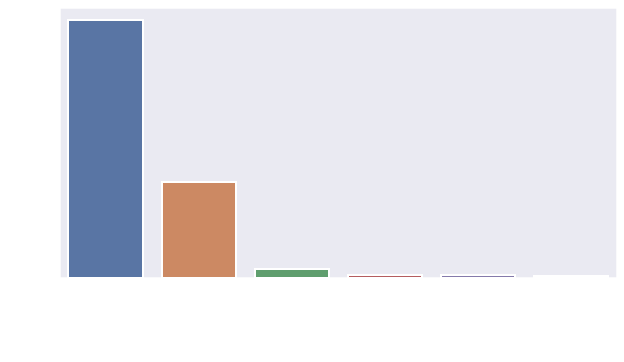

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Slot6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")